# Diamond Price Modelling

 **What are diamonds ?**

> Diamond is a solid form of the element carbon with its atoms arranged in a crystal structure called diamond cubic.
The most familiar uses of diamonds today are as gemstones used for adornment, and as industrial abrasives for cutting hard materials.

![]

 **In this notebook, we will try to build a model to predict the prices of diamonds based on various features of diamond  like carat weight, cut quality ,etc.**
 
*Dataset used in this notebook has been taken from [KAGGLE](https://www.kaggle.com/shivam2503/diamonds)*

## TOPICS

1. [**A Quick Look at the Dataset**](#link1)
2. [**Exploring Correlation between Features**](#link2)
3. [**Splitting Data into Test and Train Set**](#link3)
4. [**Data Visualisation**](#link4)
5. [**Preparing Data for ML algorithm**](#link5)
6. [**Applying ML Algorithm on the Dataset**](#link6)
7. [**Conclusion**](#link7)

<a id="link1"></a>


## A Quick Look at the Dataset

### Importing the important libraries required for this project and getting the data from the dataset

**Note**
 save_img() function is used to store the plots and figures in an external folder.

In [57]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action = "ignore")

%matplotlib inline


# Directory where to save the figures

ROOT_DIR = "."
CHAPTER_ID = "diamond_p_model"
IMAGES_PATH = os.path.join(ROOT_DIR, "images" , CHAPTER_ID)

# Function to save the plots 
def save_img(fig_id, tight_layout = True, file_extension = "png" ,resolution = 300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + file_extension)
    print("Saving figure ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = file_extension, dpi = resolution)
    

diamonds = pd.read_csv("dataset/diamonds.csv")


**Now let's take a look at our diamond dataset.**

In [58]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [59]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### Features of the Dataset

- **Carat** weight of the diamond
- **cut** Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal - - - **color** Color of the diamond, with D being the best and J the worst
- **clarity** How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
- **depth** The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- **table** The width of the diamond's table expressed as a percentage of its average diameter
- **price** the price of the diamond
- **x** length mm
- **y** width mm
- **z** depth mm

In [60]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [61]:
diamonds["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [62]:
diamonds["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

### Dropping the unnecessary column Unnamed: 0

In [63]:
# Price is of different data type and unnecessary column "Unnamed"
diamonds = diamonds.drop("Unnamed: 0",axis = 1)
diamonds["price"] = diamonds["price"].astype("float64")

In [64]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [65]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Plotting Histogram to get an idea about the different features/attributes of the dataset

Saving figure  attribute_histogram_plots


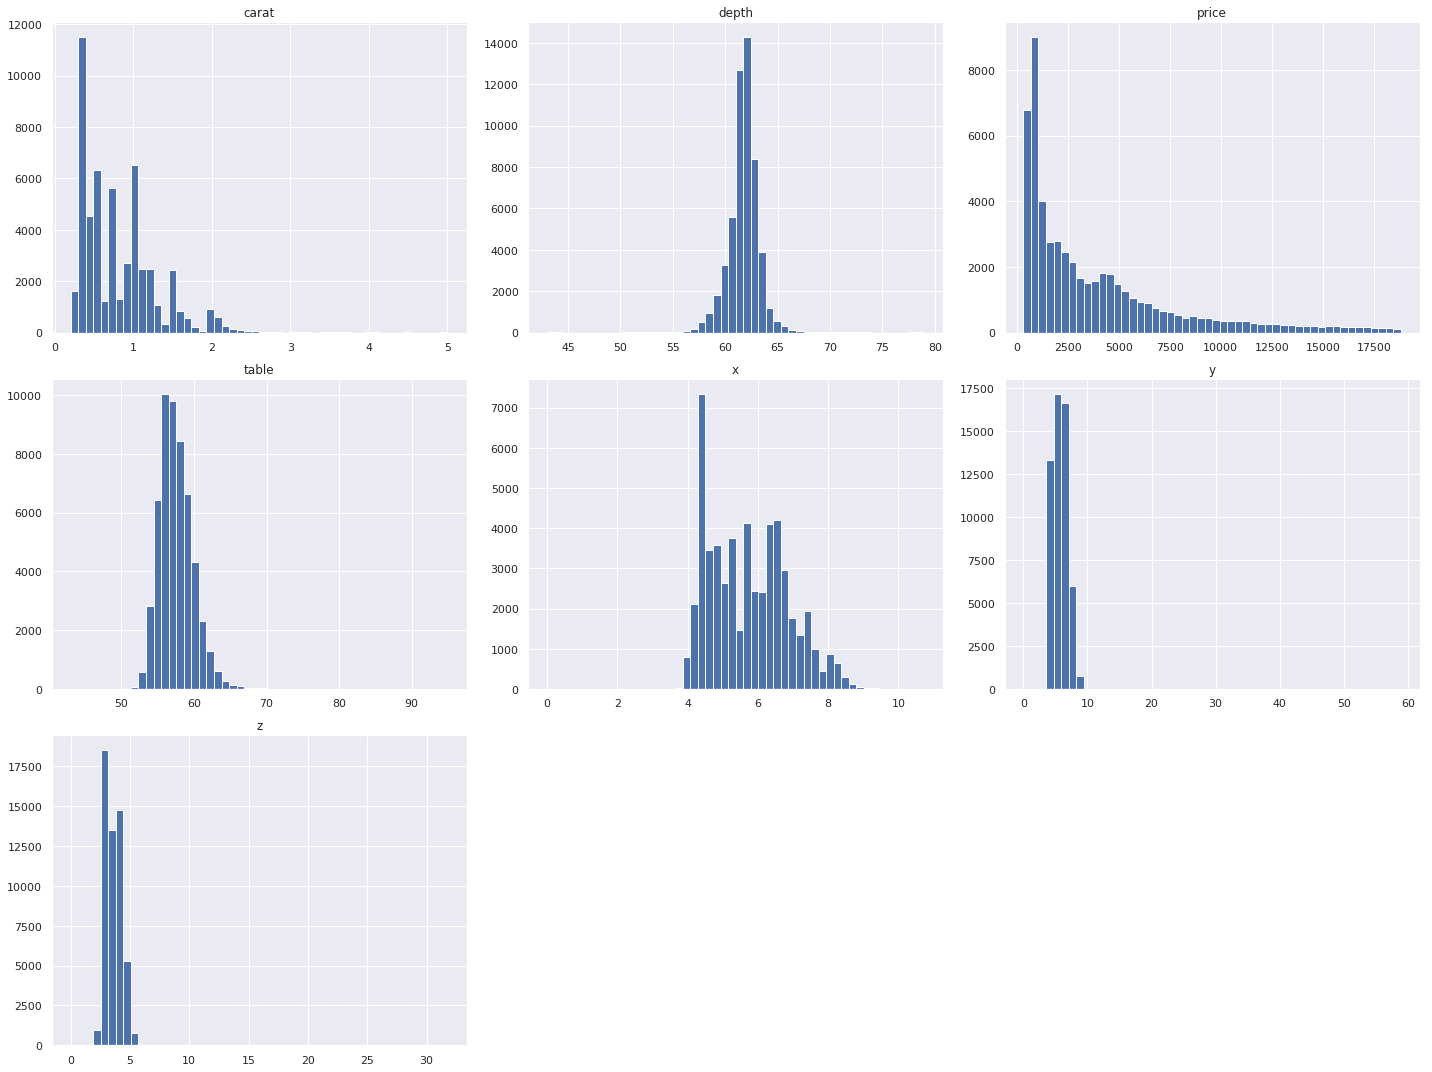

In [66]:
diamonds.hist(bins = 50, figsize = (20,15))
save_img("attribute_histogram_plots")
plt.show()

<a id="link2"></a>

## Exploring Correlation between Features

Saving figure  correlation_heatmap


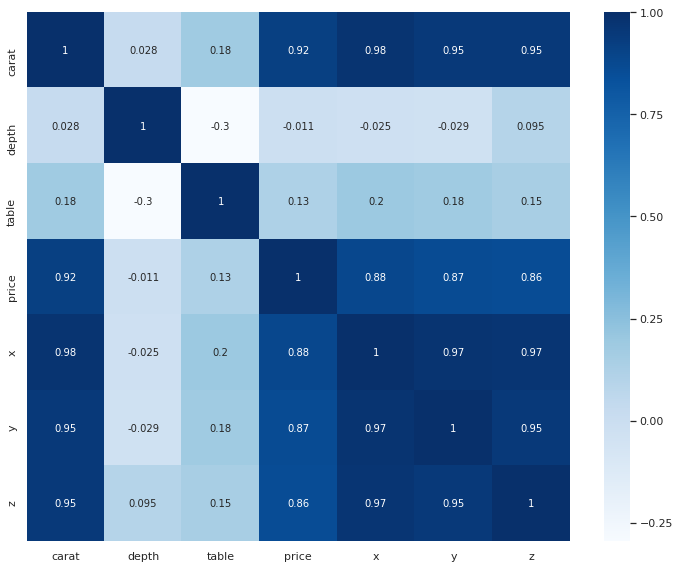

In [67]:
corr_matrix = diamonds.corr()

plt.subplots(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "Blues")
save_img("correlation_heatmap")
plt.show()

### Conclusions
 - **x , y and z are correlated with the price.** 
 - **Price of the diamond and carat weight of the diamond are highly correlated**
 - **Depth and Table are weakly correlated with the price of the diamond.**
 - **Carat is one of the main features to predict the price of a diamond.**

<a id="link3"></a>


### Splitting Data into Test and Train Set

It is advisable to split the dataset into Test set (80%) and Train set (20%). The test set allows our model to make 
predictions on values which it has never seen before.

But taking random samples from our dataset can introduce significant **sampling bias**. Therefore, in order to avoid sampling bias, the data will be divide into different homogenous subgroups called strata. This is called **Stratified Sampling**. Since, we know that carat is the most important parameter to predict the price of the diamonds we will use it for Stratified sampling 

Saving figure  plt_diamond_carat


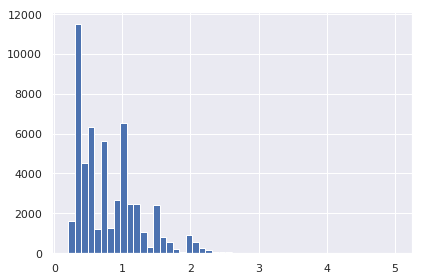

In [68]:
diamonds["carat"].hist(bins = 50)
save_img("plt_diamond_carat")
plt.show()

In [69]:
diamonds["carat"].max()

5.01

In [70]:
diamonds["carat"].min()

0.2

Most of the carat value ranges from 0.3 to 1.2. So, we will divide the carat into 5 categories.

In [71]:
# Divide by 0.4 to limit the number of carat strata

diamonds["carat_cat"] = np.ceil(diamonds["carat"]/0.4)

# Label those above 5 as 5
diamonds["carat_cat"].where(diamonds["carat_cat"] < 5, 5.0, inplace = True)

In [72]:
diamonds["carat_cat"].value_counts()

2.0    17020
1.0    14391
3.0    13374
4.0     5907
5.0     3248
Name: carat_cat, dtype: int64

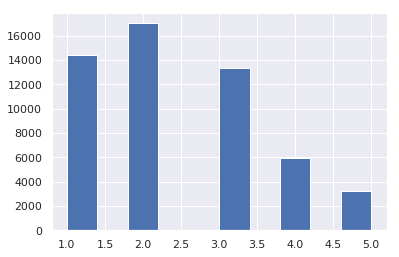

In [73]:
diamonds["carat_cat"].hist()

Now we will perform the stratified splitting of the dataset using sklearn's StratifiedShuffleSplit class

In [74]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(diamonds,diamonds["carat_cat"]):
    strat_train_set = diamonds.loc[train_index]
    strat_test_set = diamonds.loc[test_index]
    

In [75]:
strat_test_set["carat_cat"].value_counts() / len(strat_test_set)

2.0    0.315536
1.0    0.266778
3.0    0.247961
4.0    0.109473
5.0    0.060252
Name: carat_cat, dtype: float64

We will now drop the carat category columns.

In [76]:
for x in (strat_test_set, strat_train_set):
    x.drop("carat_cat", axis=1,inplace = True)

In [77]:
strat_test_set.describe()

,carat,depth,table,price,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.797741,61.729329,57.480580,3956.750649,5.730093,5.734634,3.536117
std,0.474259,1.430505,2.242666,4045.204490,1.123129,1.142879,0.697210
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,954.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2395.500000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5348.000000,6.530000,6.530000,4.030000
max,5.010000,71.800000,73.000000,18804.000000,10.740000,31.800000,6.980000


Size of Test Set = 10788

In [78]:
strat_train_set.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797989,61.754424,57.451335,3926.811990,5.731423,5.734499,3.539388
std,0.473955,1.433123,2.232430,3975.401149,1.121431,1.141962,0.707812
min,0.200000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2403.000000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5320.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,31.800000


Size of Train Set = 43152

<a id="link4"></a>


## Data Visualisation 

We will be using training set to plot varoius graphs to visualise and draw conclusions from the data.

In [79]:
diamonds = strat_train_set.copy()

### Plotting scatterplot between price and carat

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Saving figure  bad_visualisation_plot


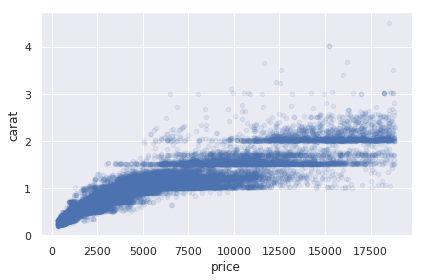

In [80]:
diamonds.plot(kind="scatter", x="price", y="carat",alpha = 0.1)
save_img("bad_visualisation_plot")
plt.show()

### Count plots of different categorical features of diamonds

Saving figure  feature_count_plots


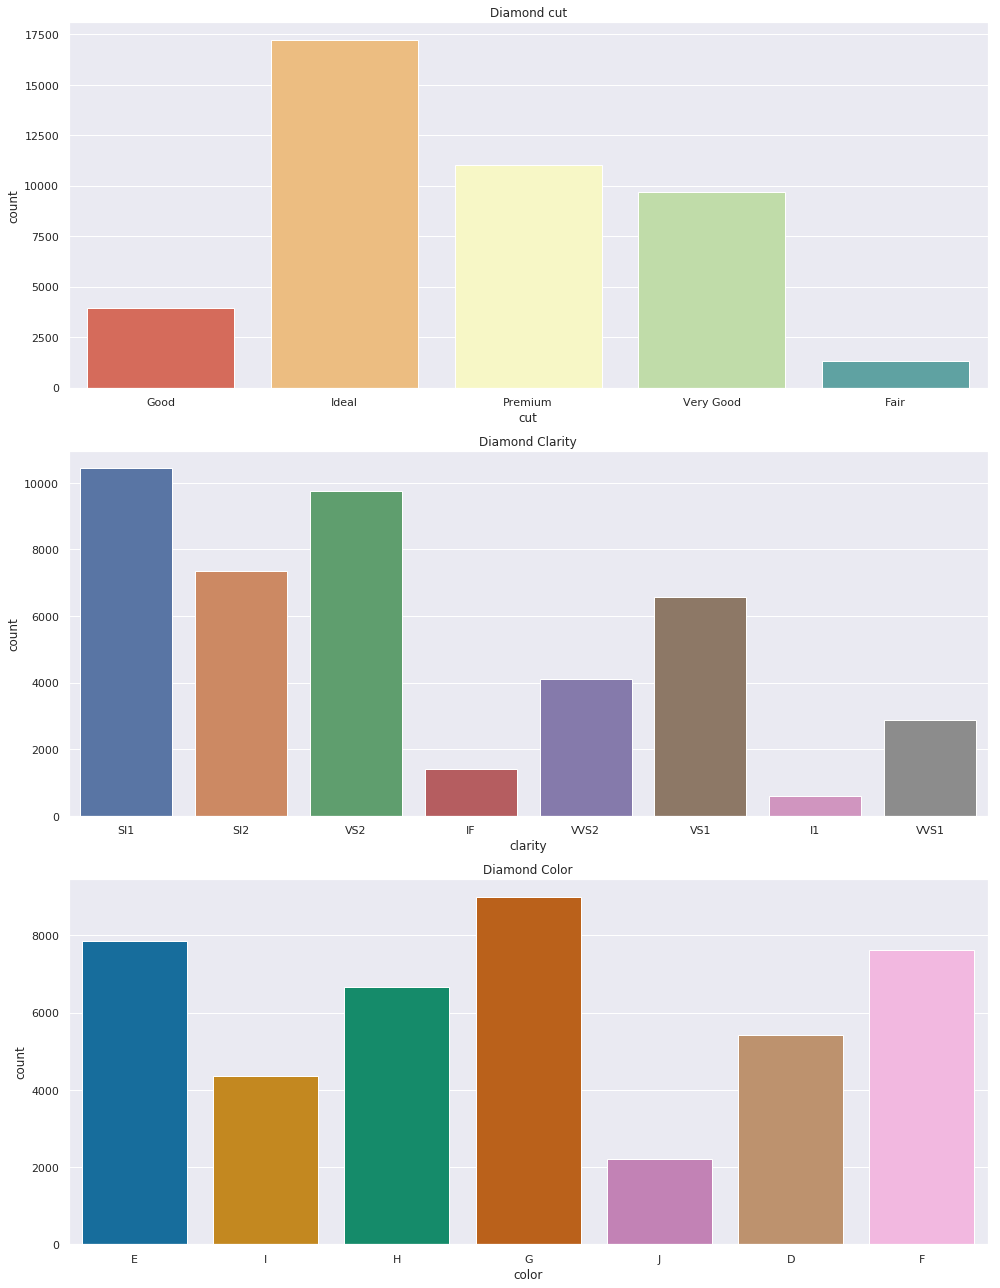

In [81]:
fig, ax = plt.subplots(3, figsize = (14,18))
sns.countplot('cut',data = diamonds, ax=ax[0],palette="Spectral")
sns.countplot('clarity',data = diamonds, ax=ax[1],palette="deep")
sns.countplot('color',data = diamonds, ax=ax[2],palette="colorblind")
ax[0].set_title("Diamond cut")
ax[1].set_title("Diamond Clarity")
ax[2].set_title("Diamond Color")
save_img("feature_count_plots")
plt.show()

### Comparison of carat with price based on diamond cut.

Saving figure  relation_cut


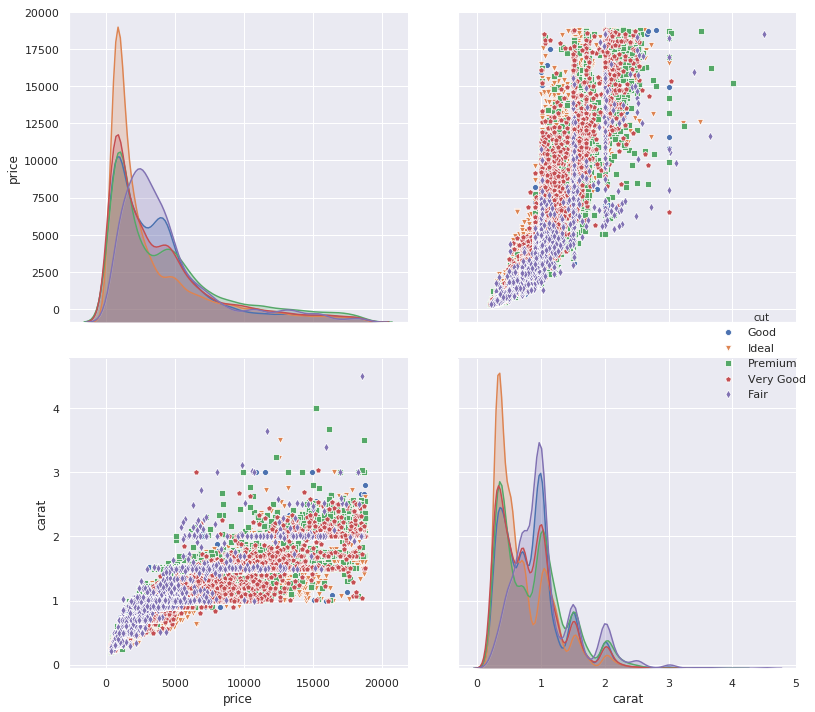

Saving figure  relation_cuts


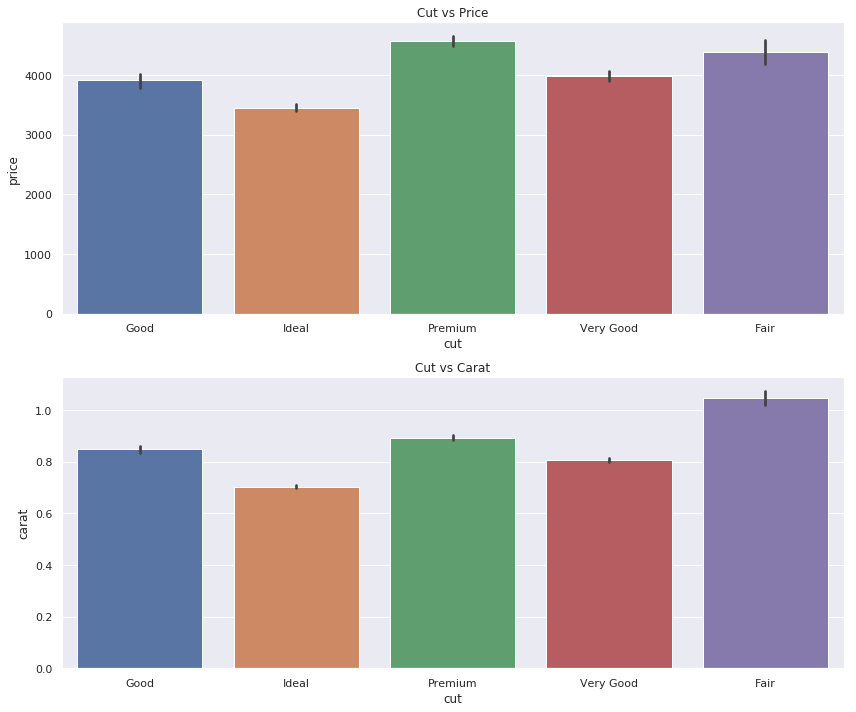

In [82]:
sns.pairplot(diamonds[["price","carat","cut"]], markers = ["o","v","s","p","d"],hue="cut", height=5)
save_img("relation_cut")
plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="cut",y="price",data = diamonds,ax=ax[0])
sns.barplot(x="cut",y="carat",data = diamonds, ax=ax[1])
ax[0].set_title("Cut vs Price")
ax[1].set_title("Cut vs Carat")
save_img("relation_cuts")
plt.show()

**Conclusion**
- Fair cut diamonds weigh the most but are not the most expensive diamonds.
- Premium cut diamonds are the most expensive diamonds.
- Ideal cut diamonds weigh less and are cheapest diamonds.

We can see that price of diamond is dependent on the cut.

### Comparison of carat with price based on diamond color

Saving figure  relation_color


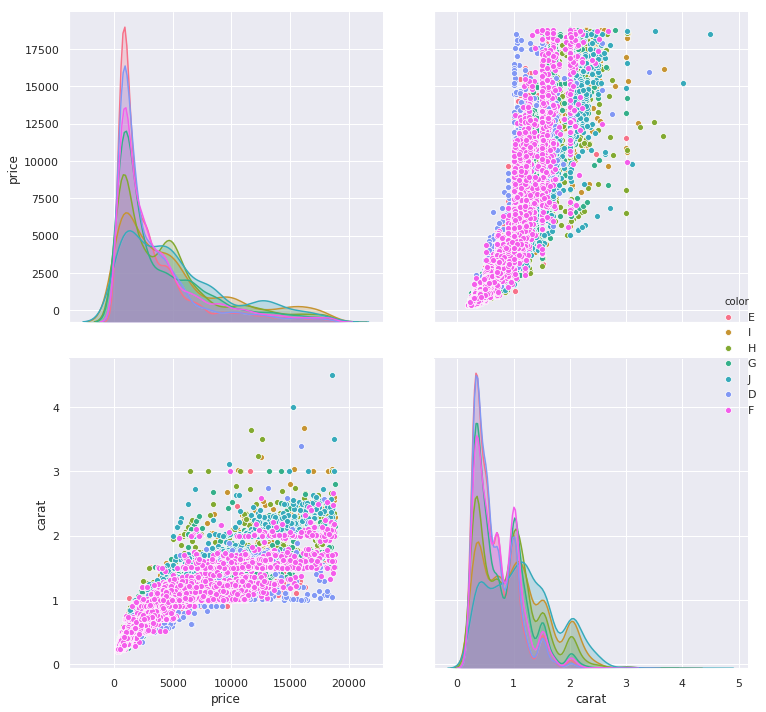

Saving figure  relation_colors


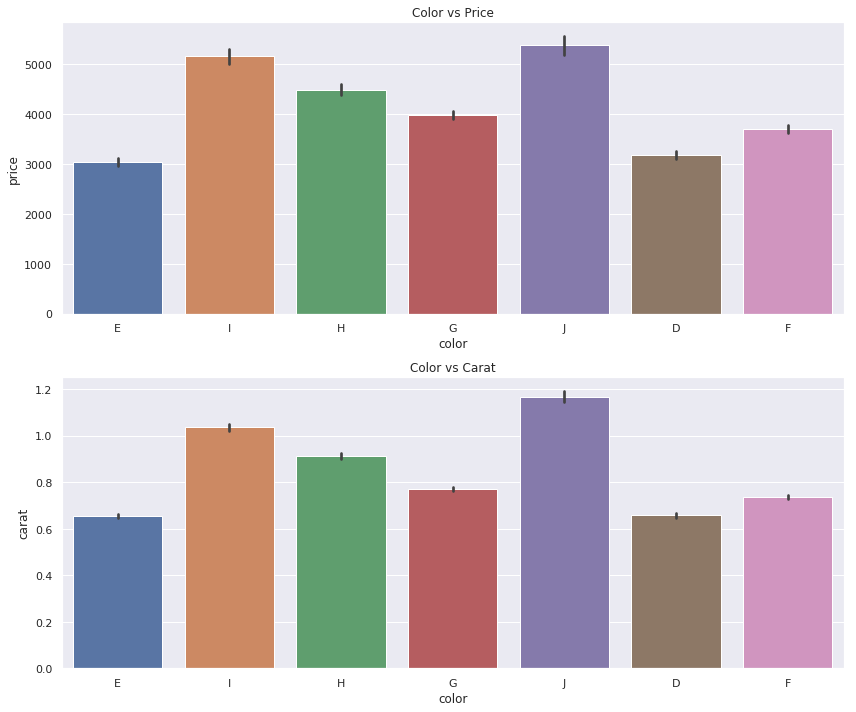

In [83]:
sns.pairplot(diamonds[["price","carat","color"]], hue="color", height=5, palette="husl")
save_img("relation_color")
plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="color",y="price",data = diamonds,ax=ax[0])
sns.barplot(x="color",y="carat",data = diamonds, ax=ax[1])
ax[0].set_title("Color vs Price")
ax[1].set_title("Color vs Carat")
save_img("relation_colors")
plt.show()

**Conclusions**
- J color diamonds are the most expensive and the heaviest diamonds.
- The two plots are very similar.

Thus, it can be concluded that the heavier diamond is expensive, if only color is considered.

### Comparison of carat with price based on diamond clarity

Saving figure  relation_clarity


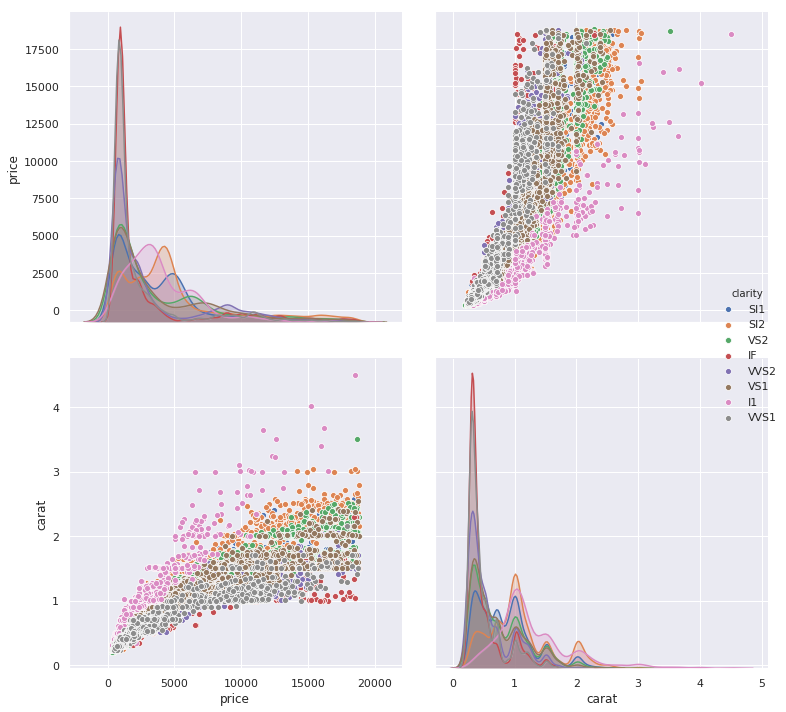

Saving figure  relation_clarities


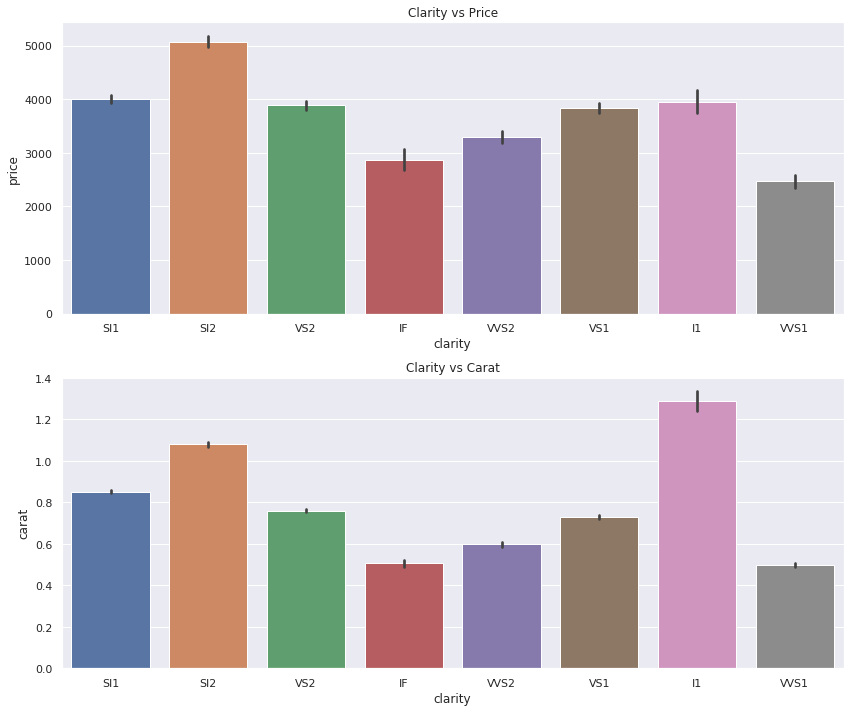

In [84]:
sns.pairplot(diamonds[["price","carat","clarity"]],hue="clarity", height=5)
save_img("relation_clarity")
plt.show()

f, ax = plt.subplots(2,figsize = (12,10))
sns.barplot(x="clarity",y="price",data = diamonds,ax=ax[0])
sns.barplot(x="clarity",y="carat",data = diamonds, ax=ax[1])
ax[0].set_title("Clarity vs Price")
ax[1].set_title("Clarity vs Carat")
save_img("relation_clarities")
plt.show()

### More plots to understand the realtion between cut,color and clarity with prices

Saving figure  feature_violin_plots


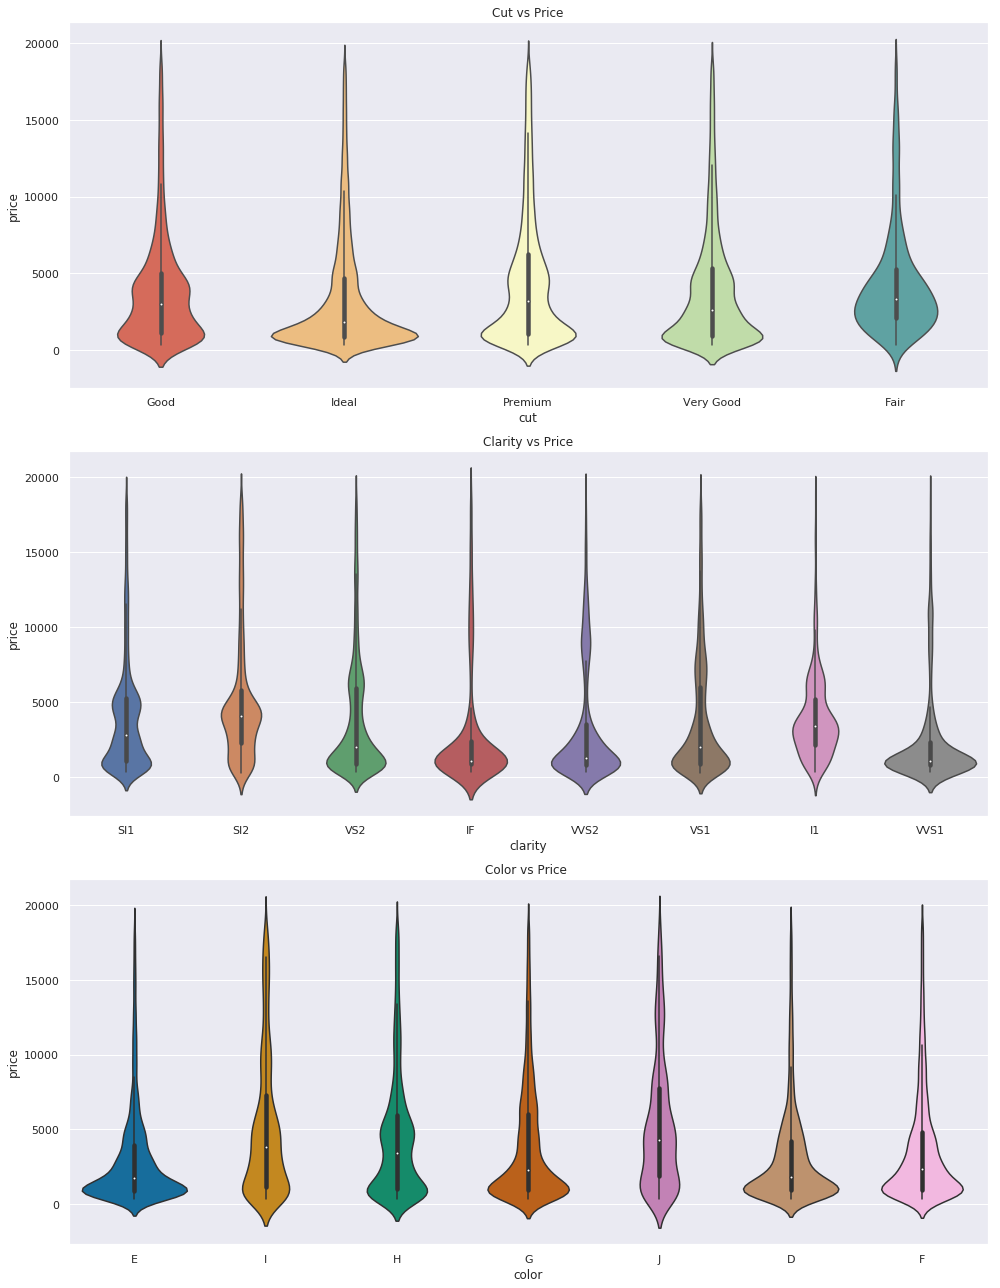

In [85]:
fig, ax = plt.subplots(3, figsize = (14,18))
sns.violinplot(x='cut',y='price',data = diamonds, ax=ax[0],palette="Spectral")
sns.violinplot(x='clarity',y='price',data = diamonds, ax=ax[1],palette="deep")
sns.violinplot(x='color',y='price',data = diamonds, ax=ax[2],palette="colorblind")
ax[0].set_title("Cut vs Price")
ax[1].set_title("Clarity vs Price")
ax[2].set_title("Color vs Price ")
save_img("feature_violin_plots")
plt.show()

Saving figure  scatter_matrix_plot


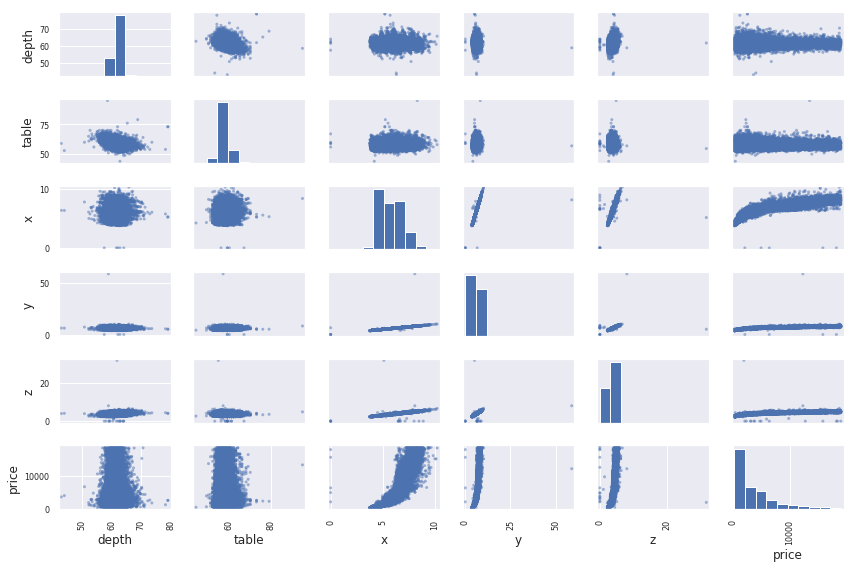

In [87]:
from pandas.plotting import scatter_matrix

attributes = ["depth","table","x","y","z","price"]
scatter_matrix(diamonds[attributes], figsize=(12, 8))
save_img("scatter_matrix_plot")

<a id="link5"></a>


## Preparing data for the ML Algorithms


In [88]:
sample_incomplete_rows = diamonds[diamonds.isnull().any(axis=1)].head()
sample_incomplete_rows

,carat,cut,color,clarity,depth,table,price,x,y,z


In [89]:
diamonds = strat_train_set.drop("price", axis=1)
diamonds_label = strat_train_set["price"].copy()
diamonds_only_num = diamonds.drop(["cut","clarity","color"],axis=1)

diamonds_only_num.head()

,carat,depth,table,x,y,z
5906,0.90,60.8,65.0,6.14,6.17,3.74
8859,1.13,61.4,56.0,6.69,6.71,4.12
50784,0.76,61.3,59.0,5.85,5.83,3.58
53587,0.80,62.0,59.0,5.91,5.96,3.68
24965,2.02,63.0,60.0,7.85,7.79,4.93



### Feature Scaling


Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. Therefore, it is necessary to feature scale all the features of diamond dataset. There are two ways of doing feature scaling -min-max scaling and standardization. I will be using standardization as it is not affected by any outliers.

In [90]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
diamonds_scaled_num = std_scaler.fit_transform(diamonds_only_num)

diamonds_scaled_num

array([[ 2.15235199e-01, -6.65982809e-01,  3.38140637e+00,
         3.64339218e-01,  3.81366551e-01,  2.83428981e-01],
       [ 7.00519195e-01, -2.47311727e-01, -6.50121933e-01,
         8.54789578e-01,  8.54242452e-01,  8.20301156e-01],
       [-8.01550596e-02, -3.17090241e-01,  6.93720836e-01,
         1.05738119e-01,  8.36298718e-02,  5.73775392e-02],
       ...,
       [-5.65439056e-01,  1.14825855e+00, -1.09806952e+00,
        -5.54140548e-01, -4.41787797e-01, -3.66468914e-01],
       [-2.06750885e-01,  1.00870152e+00, -1.09806952e+00,
        -1.35028422e-01, -9.15093510e-02,  8.64678720e-04],
       [ 4.47327545e-01,  7.99365978e-01,  2.45773246e-01,
         5.33767524e-01,  5.65262734e-01,  6.50762574e-01]])

In [91]:
pd.DataFrame(diamonds_scaled_num).head()

,0,1,2,3,4,5
0,0.215235,-0.665983,3.381406,0.364339,0.381367,0.283429
1,0.700519,-0.247312,-0.650122,0.854790,0.854242,0.820301
2,-0.080155,-0.317090,0.693721,0.105738,0.083630,0.057378
3,0.004242,0.171359,0.693721,0.159242,0.197470,0.198660
4,2.578357,0.869144,1.141668,1.889194,1.799994,1.964687


### Encoding Categorical Attributes

In this dataset, we have three categorical attributes.ML algorithms work better with numbers.Thus, we will convert them into numbers using OneHotEncoder of scikit learn.

In [92]:
diamonds_cat = diamonds[["cut","color","clarity"]]
diamonds_cat.head()

,cut,color,clarity
5906,Good,E,SI1
8859,Ideal,I,SI2
50784,Premium,E,SI2
53587,Premium,H,SI1
24965,Premium,H,SI1


In [93]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
diamonds_cat_encoded = cat_encoder.fit_transform(diamonds_cat)

diamonds_cat_encoded.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
cat_encoder.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

### Transformation Pipeline

We have to perform feature scaling and label encoding on dataset before feeding it into ML algorithms. So, to simplify the process we will create a pipeline using ColumnTransformer which successively performs feature scaling and Label encoding.  

In [95]:
from sklearn.compose import ColumnTransformer

num_attribs = list(diamonds_only_num)
cat_attribs = ["cut","color","clarity"]
pipeline = ColumnTransformer([
    ("num", StandardScaler(),num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])

diamonds_prepared = pipeline.fit_transform(diamonds)

In [96]:
diamonds_prepared

array([[ 0.2152352 , -0.66598281,  3.38140637, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.70051919, -0.24731173, -0.65012193, ...,  0.        ,
         0.        ,  0.        ],
       [-0.08015506, -0.31709024,  0.69372084, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.56543906,  1.14825855, -1.09806952, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20675088,  1.00870152, -1.09806952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.44732754,  0.79936598,  0.24577325, ...,  0.        ,
         0.        ,  0.        ]])

In [97]:
pd.DataFrame(diamonds_prepared).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.215235,-0.665983,3.381406,0.364339,0.381367,0.283429,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.700519,-0.247312,-0.650122,0.854790,0.854242,0.820301,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.080155,-0.317090,0.693721,0.105738,0.083630,0.057378,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.004242,0.171359,0.693721,0.159242,0.197470,0.198660,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2.578357,0.869144,1.141668,1.889194,1.799994,1.964687,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [98]:
diamonds_prepared.shape

(43152, 26)

<a id="link6"></a>


## Applying ML Algorithms on the Dataset


Now, it is time to select a model, train it and evaluate its performance using test set.
First of all we will import mean_squared_error and cross_val_score from sklearn to evaluate the models.

We will create one function that will run through each algorithm. We'll also have variables that hold results of the algorithms for future comparisons. RMSE and CV_scores are used to check the performance. The function will plot a graph to show how well our algorithm has predicted the data.

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint

X_test = strat_test_set.drop("price",axis=1)
y_test = strat_test_set["price"].copy()

model_name = []
rmse_train_scores = []
cv_rmse_scores = []
accuracy_models = []
rmse_test_scores = []

def model_performance(modelname,model,diamonds = diamonds_prepared, diamonds_labels = diamonds_label,
                      X_test = X_test,y_test = y_test,
                      pipeline=pipeline, cv = True):
    
    model_name.append(modelname)
    
    model.fit(diamonds,diamonds_labels)
    
    predictions = model.predict(diamonds)
    mse_train_score = mean_squared_error(diamonds_labels, predictions)
    rmse_train_score = np.sqrt(mse_train_score)
    cv_rmse = np.sqrt(-cross_val_score(model,diamonds,diamonds_labels,
                                       scoring = "neg_mean_squared_error",cv=10))
    cv_rmse_mean = cv_rmse.mean()
    
    print("RMSE_Train: %.4f" %rmse_train_score)
    rmse_train_scores.append(rmse_train_score)
    print("CV_RMSE: %.4f" %cv_rmse_mean)
    cv_rmse_scores.append(cv_rmse_mean)
    
    
    print("---------------------TEST-------------------")
    
    X_test_prepared = pipeline.transform(X_test)
    
    test_predictions = model.predict(X_test_prepared)
    mse_score = mean_squared_error(y_test,test_predictions)
    rmse_score = np.sqrt(mse_score)
    
    print("RMSE_Test: %.4f" %rmse_score)
    rmse_test_scores.append(rmse_score)
    
    accuracy = (model.score(X_test_prepared,y_test)*100)
    print("accuracy: "+ str(accuracy) + "%")
    accuracy_models.append(accuracy)
    
    start = randint(1, len(y_test))
    some_data = X_test.iloc[start:start + 5]
    some_labels = y_test.iloc[start:start + 5]
    some_data_prepared = pipeline.transform(some_data)
    print("Predictions:", model.predict(some_data_prepared))
    print("Labels:    :", list(some_labels))
    
    
    plt.scatter(y_test,test_predictions)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "go--")
    save_img(modelname)
    plt.show()
    
    

**Linear Regression**

RMSE_Train: 1120.3957
CV_RMSE: 1125.9153
---------------------TEST-------------------
RMSE_Test: 1167.5023
accuracy: 91.66942898248256%
Predictions: [6057.5  826.   414.  1440.  5837. ]
Labels:    : [5385.0, 852.0, 698.0, 1389.0, 5815.0]
Saving figure  Linear Regression


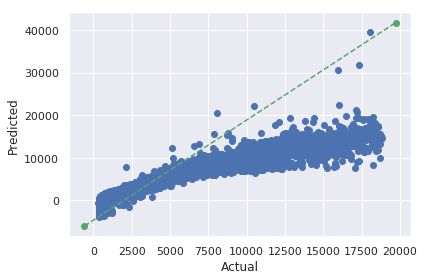

In [100]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
model_performance("Linear Regression",lin_reg)

**Decision Tree Regression**

RMSE_Train: 9.2835
CV_RMSE: 750.1795
---------------------TEST-------------------
RMSE_Test: 759.2360
accuracy: 96.4769982224413%
Predictions: [ 4683.   644. 17436.   745.  6887.]
Labels:    : [4769.0, 626.0, 15819.0, 873.0, 6459.0]
Saving figure  Decision Tree Regression


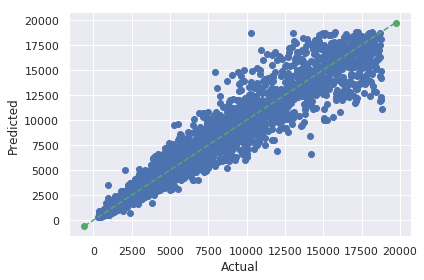

In [101]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=42)
model_performance("Decision Tree Regression",dec_tree)

**Random Forest Regression**

RMSE_Train: 240.8958
CV_RMSE: 577.7402
---------------------TEST-------------------
RMSE_Test: 578.1168
accuracy: 97.9573660426499%
Predictions: [3222.7 1783.4 4012.5 2801.4 1183.7]
Labels:    : [2639.0, 1814.0, 4065.0, 3082.0, 1240.0]
Saving figure  Random Forest Regression


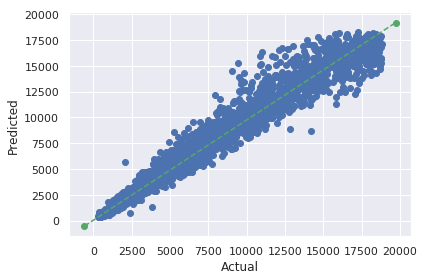

In [102]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
model_performance("Random Forest Regression",forest_reg)

**Ridge Regression**

RMSE_Train: 1775.5978
CV_RMSE: 1777.2706
---------------------TEST-------------------
RMSE_Test: 1841.5409
accuracy: 79.27368841975755%
Predictions: [6762.76432315 5859.9445038  4769.29085699 2875.26586639  485.09940787]
Labels:    : [9507.0, 4090.0, 3942.0, 1792.0, 743.0]
Saving figure  Ridge Regression


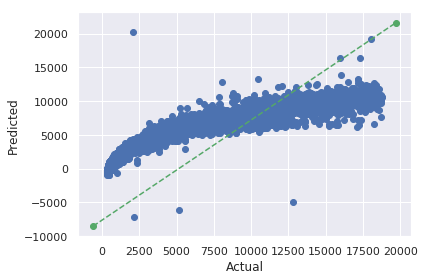

In [103]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(normalize = True)
model_performance("Ridge Regression",ridge_reg)

**Lasso Regression**

RMSE_Train: 1400.2715
CV_RMSE: 1385.3847
---------------------TEST-------------------
RMSE_Test: 1454.5329
accuracy: 87.06976530602594%
Predictions: [ 6085.80582131 10417.42652435   287.21480012  7136.22995587
  3473.87053722]
Labels:    : [8702.0, 13253.0, 673.0, 5975.0, 2377.0]
Saving figure  Lasso Regression


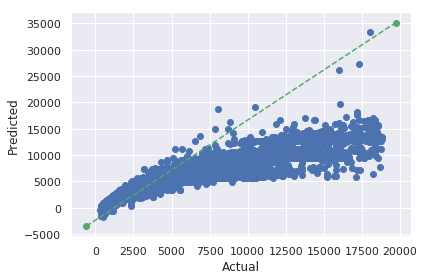

In [104]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(normalize = True)
model_performance("Lasso Regression",lasso_reg)

**Elastic Net Regression**

RMSE_Train: 1719.3108
CV_RMSE: 1720.9195
---------------------TEST-------------------
RMSE_Test: 1781.1894
accuracy: 80.60992528797586%
Predictions: [-144.83345625  209.55408382 3880.94848912 5650.75473861 6449.98297647]
Labels:    : [560.0, 605.0, 3321.0, 5686.0, 3678.0]
Saving figure  Elastic Net Regression


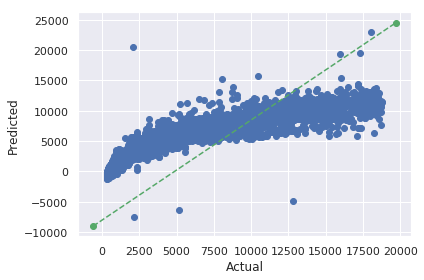

In [105]:
from sklearn.linear_model import ElasticNet

net_reg = ElasticNet()
model_performance("Elastic Net Regression",net_reg)

**Ada Boost Regression**

RMSE_Train: 1420.2284
CV_RMSE: 1468.5037
---------------------TEST-------------------
RMSE_Test: 1440.9878
accuracy: 87.30946513665083%
Predictions: [ 7972.14161528  1154.99804382  1154.99804382 10941.97980447
  7647.86944961]
Labels:    : [10685.0, 746.0, 1084.0, 10038.0, 5245.0]
Saving figure  Ada Boost Regression


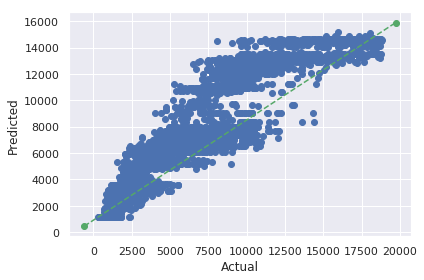

In [106]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators = 100)
model_performance("Ada Boost Regression",ada_reg)

**Gradient Boosting Regression**

RMSE_Train: 1228.6672
CV_RMSE: 1235.8964
---------------------TEST-------------------
RMSE_Test: 1268.8257
accuracy: 90.16072185956554%
Predictions: [ 1076.10072824 10728.07331445  1208.31867027  1076.10072824
 14878.73908373]
Labels:    : [1109.0, 9791.0, 1356.0, 743.0, 17579.0]
Saving figure  Gradient Boosting Regression


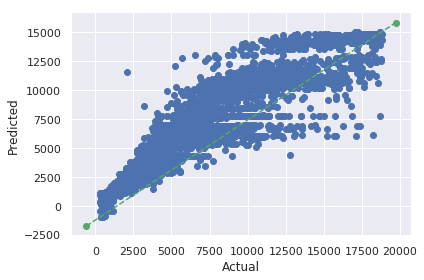

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,
                                     max_depth = 1, random_state = 42, loss = 'ls')
model_performance("Gradient Boosting Regression",grad_reg)

### Comparing the Accuracies of different Regression Models

In [108]:
compare_models = pd.DataFrame({"Algorithms" : model_name, "Models RMSE" : rmse_test_scores, 
                               "CV RMSE Mean" : cv_rmse_scores, "Accuracy" : accuracy_models})
compare_models.sort_values(by = "Accuracy", ascending=False)

,Algorithms,Models RMSE,CV RMSE Mean,Accuracy
2,Random Forest Regression,578.116846,577.740208,97.957366
1,Decision Tree Regression,759.235982,750.179507,96.476998
0,Linear Regression,1167.502278,1125.915282,91.669429
7,Gradient Boosting Regression,1268.825709,1235.896393,90.160722
6,Ada Boost Regression,1440.987835,1468.503692,87.309465
4,Lasso Regression,1454.532920,1385.384709,87.069765
5,Elastic Net Regression,1781.189361,1720.919506,80.609925
3,Ridge Regression,1841.540873,1777.270562,79.273688


Saving figure  accuracy_comparison


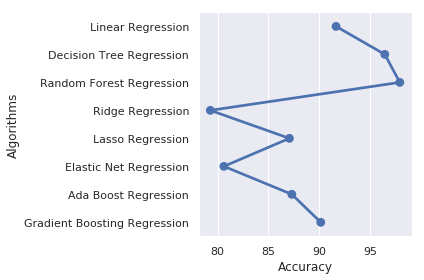

In [109]:
sns.pointplot("Accuracy","Algorithms",data=pd.DataFrame({'Algorithms':model_name,"Accuracy":accuracy_models}))
save_img("accuracy_comparison")


<a id="link7"></a>


## Conclusion

**Random Forest Regressor gives us the Highest accuracy.**

**THANK YOU**